# Household Hazardous Waste Notebook

This notebook is based on:
 
[2] Statistics Canada, “Table 38-10-0155-01  Household hazardous waste.” Statistics Canada, Jul. 18, 2022. doi: https://doi.org/10.25318/3810015501-eng. Available: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810015501&pickMembers%5B0%5D=1.21&cubeTimeFrame.startYear=2011&cubeTimeFrame.endYear=2021&referencePeriods=20110101%2C20210101

I set the city to be Montreal only. I use this notebook to plot interesting household hazardous waste data for the city of Montreal.

**Problems**: This dataset contains cells that have certain special notations that I handle in different ways.
  - Cells that have a `E` after their value are to be used with caution, according to Statscan. For the purposes of demonstration, I treat those values at face-value and remove the `E` from the value.
  - Cells that have a `F` in them are too unreliable to be published, according to Statscan. I treat those as `NaN` values.

In [1]:
from pathlib import Path
from re import sub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the file path
file_path = Path('images/hazardous_waste/')
file_path.mkdir(parents=True, exist_ok=True)

## Get all the data

In [3]:
hazard_waste = pd.read_csv('data/Household Hazardous Waste.csv')
hazard_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication 2,41,48,51,48,47,44
1,Put leftover or expired medication in the garb...,21,11,9E,8E,15,14
2,Took or sent leftover or expired medication to...,F,3E,F,F,6E,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,F,F,F,F,F,F
5,Still had leftover or expired medication at th...,F,9E,10E,8E,11,13
6,Did something else with leftover or expired me...,F,F,F,F,F,F
7,Medical sharps 2,8E,9,11E,10,10,11
8,Put medical sharps in the garbage 4,F,F,F,F,F,14E
9,Used a medical sharps disposal program 4,F,19E,F,28E,F,14E


In [4]:
# Clean up the Household hazardous waste column. It has numbers at the end of each description
hazard_waste['Household hazardous waste'] = hazard_waste['Household hazardous waste'].apply(lambda x: sub(f'\d+', '', x).strip())
hazard_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9E,8E,15,14
2,Took or sent leftover or expired medication to...,F,3E,F,F,6E,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,F,F,F,F,F,F
5,Still had leftover or expired medication at th...,F,9E,10E,8E,11,13
6,Did something else with leftover or expired me...,F,F,F,F,F,F
7,Medical sharps,8E,9,11E,10,10,11
8,Put medical sharps in the garbage,F,F,F,F,F,14E
9,Used a medical sharps disposal program,F,19E,F,28E,F,14E


In [5]:
# Clean up data columns. Replace `F`, `..` with `NaN`  
hazard_waste = hazard_waste.replace('F', np.nan)
hazard_waste = hazard_waste.replace('..', np.nan)

# Go through the year columns. Replace all the cells with an `E` with just the number in that cell
for col in hazard_waste.columns[1:]:
    hazard_waste[col] = hazard_waste[col].apply(lambda x: sub(r'(\d+)E', r'\1', x) if type(x) is str else x)
hazard_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9,8,15,14
2,Took or sent leftover or expired medication to...,NaN,3,NaN,NaN,6,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,NaN,NaN,NaN,NaN,NaN,NaN
5,Still had leftover or expired medication at th...,NaN,9,10,8,11,13
6,Did something else with leftover or expired me...,NaN,NaN,NaN,NaN,NaN,NaN
7,Medical sharps,8,9,11,10,10,11
8,Put medical sharps in the garbage,NaN,NaN,NaN,NaN,NaN,14
9,Used a medical sharps disposal program,NaN,19,NaN,28,NaN,14


In [6]:
# Ensure the proper types
hazard_waste = hazard_waste.astype(
    {'2011': float, '2013': float,
     '2015': float, '2017': float,
     '2019': float, '2021': float}
)
hazard_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41.0,48.0,51.0,48.0,47.0,44.0
1,Put leftover or expired medication in the garbage,21.0,11.0,9.0,8.0,15.0,14.0
2,Took or sent leftover or expired medication to...,NaN,3.0,NaN,NaN,6.0,8.0
3,Returned leftover or expired medication to a s...,71.0,80.0,84.0,84.0,73.0,69.0
4,Poured leftover or expired medication down the...,NaN,NaN,NaN,NaN,NaN,NaN
5,Still had leftover or expired medication at th...,NaN,9.0,10.0,8.0,11.0,13.0
6,Did something else with leftover or expired me...,NaN,NaN,NaN,NaN,NaN,NaN
7,Medical sharps,8.0,9.0,11.0,10.0,10.0,11.0
8,Put medical sharps in the garbage,NaN,NaN,NaN,NaN,NaN,14.0
9,Used a medical sharps disposal program,NaN,19.0,NaN,28.0,NaN,14.0


**Of these data, we only care about batteries.**

## Process the battery-related data only

In [7]:
# Get only the battery related data
batteries = hazard_waste[
    (hazard_waste['Household hazardous waste'].str.contains('batteries')) & 
    (hazard_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

batteries

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Dead or unwanted batteries (excluding car batt...,60.0,61.0,70.0,60.0,68.0,67.0
1,Put dead or unwanted batteries (excluding car ...,30.0,19.0,14.0,11.0,15.0,14.0
2,Took or sent dead or unwanted batteries (exclu...,50.0,56.0,59.0,52.0,60.0,63.0
3,Returned dead or unwanted batteries (excluding...,8.0,16.0,15.0,18.0,14.0,11.0
4,Still had dead or unwanted batteries (excludin...,17.0,14.0,15.0,17.0,14.0,18.0
5,Did something else with dead or unwanted batte...,2.0,4.0,4.0,10.0,4.0,NaN


In [8]:
# From this, get only the data where the item was unwanted
had_unwanted = batteries[batteries['Household hazardous waste'] == 'Dead or unwanted batteries (excluding car batteries)'].iloc[:, 1:]
had_unwanted

,2011,2013,2015,2017,2019,2021
0,60.0,61.0,70.0,60.0,68.0,67.0


In [9]:
# Transpose the data for easier plotting
had_unwanted = had_unwanted.T
had_unwanted = had_unwanted.reset_index()
had_unwanted = had_unwanted.rename(columns={'index': 'Year', 0: 'Percentage'})
had_unwanted

,Year,Percentage
0,2011,60.0
1,2013,61.0
2,2015,70.0
3,2017,60.0
4,2019,68.0
5,2021,67.0


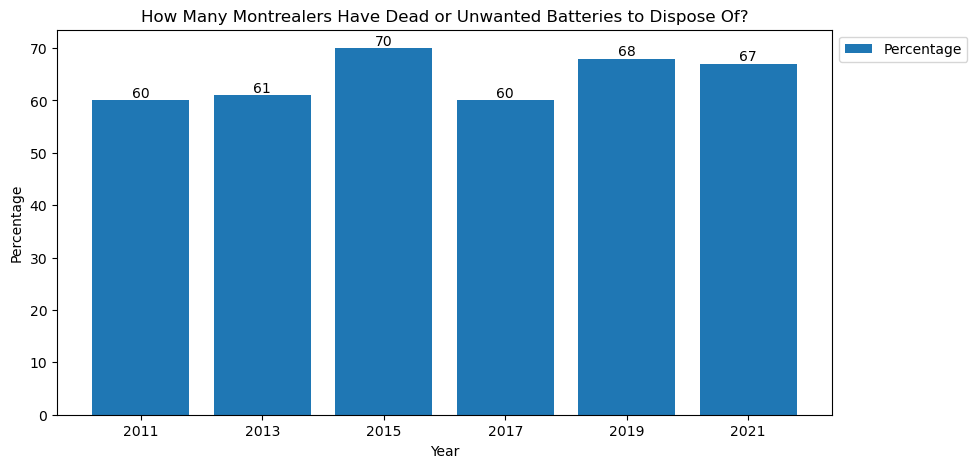

In [10]:
# Create the plot for the unwanted item data
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(had_unwanted['Year'], had_unwanted['Percentage'])  # Create the bars for the plot
ax.bar_label(bars)  # Add values to the tops of the bars

# Set metadata
plt.title("How Many Montrealers Have Dead or Unwanted Batteries to Dispose Of?")
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend([bars], ["Percentage"], loc='upper left', bbox_to_anchor=(1.0, 1.0))  # Ensure legend is beyond the plot

# Save plot
plt.savefig(file_path / 'batteries_main_plot.png', bbox_inches='tight')

In [11]:
# Get the rest of the data. i.e. all the data except the unwanted data
rest_of_data = batteries.iloc[1:].T
rest_of_data

,1,2,3,4,5
Household hazardous waste,Put dead or unwanted batteries (excluding car ...,Took or sent dead or unwanted batteries (exclu...,Returned dead or unwanted batteries (excluding...,Still had dead or unwanted batteries (excludin...,Did something else with dead or unwanted batte...
2011,30.0,50.0,8.0,17.0,2.0
2013,19.0,56.0,16.0,14.0,4.0
2015,14.0,59.0,15.0,15.0,4.0
2017,11.0,52.0,18.0,17.0,10.0
2019,15.0,60.0,14.0,14.0,4.0
2021,14.0,63.0,11.0,18.0,NaN


In [12]:
# Manipulate the DataFrame to be more appropriate for stacked bar charts

rest_of_data.columns = rest_of_data.iloc[0].values  # Set the column names to the first row

rest_of_data = rest_of_data.reset_index()
rest_of_data = rest_of_data.iloc[1:]  # Delete the first row
rest_of_data = rest_of_data.rename(columns={'index': 'Year'})
rest_of_data

,Year,Put dead or unwanted batteries (excluding car batteries) in the garbage,Took or sent dead or unwanted batteries (excluding car batteries) to a depot or drop-off centre,Returned dead or unwanted batteries (excluding car batteries) to a supplier/retailer,Still had dead or unwanted batteries (excluding car batteries) at the time of interview,Did something else with dead or unwanted batteries (excluding car batteries)
1,2011,30.0,50.0,8.0,17.0,2.0
2,2013,19.0,56.0,16.0,14.0,4.0
3,2015,14.0,59.0,15.0,15.0,4.0
4,2017,11.0,52.0,18.0,17.0,10.0
5,2019,15.0,60.0,14.0,14.0,4.0
6,2021,14.0,63.0,11.0,18.0,NaN


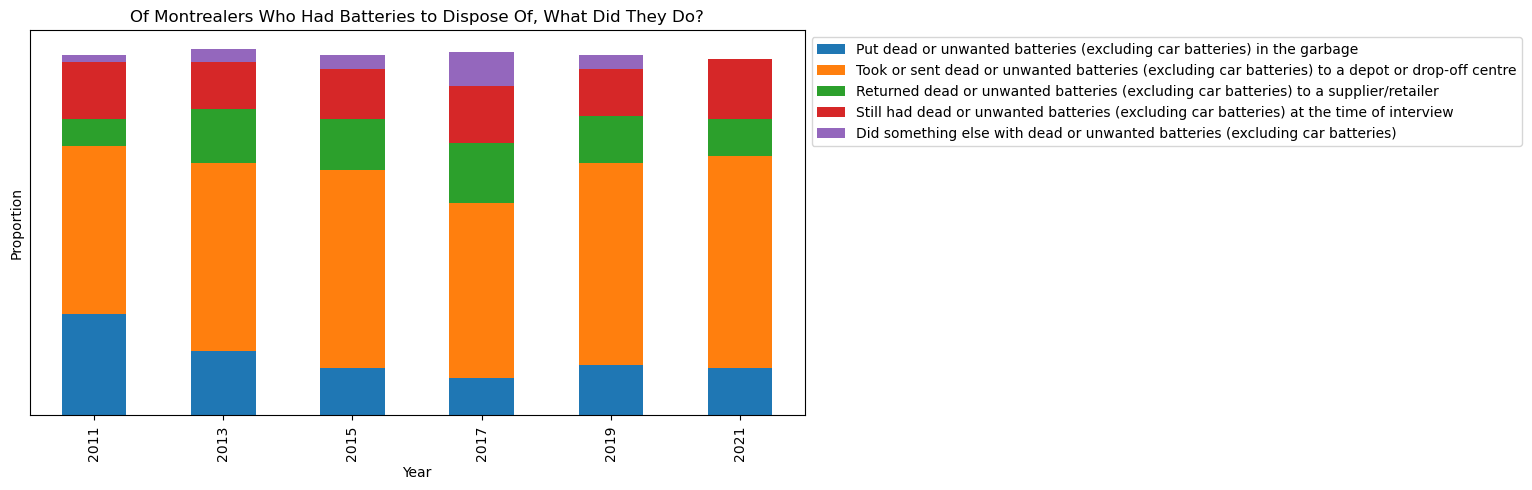

In [13]:
# Plot the stacked bar chart
rest_of_data.plot(x='Year', kind='bar', stacked=True, figsize=(10, 5), title="Of Montrealers Who Had Batteries to Dispose Of, What Did They Do?")

# Set metadata
plt.ylabel('Proportion')
plt.yticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Save the plot
plt.savefig(file_path / 'batteries_stacked_plot.png', bbox_inches='tight')